In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/balancedData.csv')
pd.set_option("display.max_columns", None)

In [3]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,7.0,11.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,6.0,6.7,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,2.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.4,12.2,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,2.2,13.3,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,7.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,3.8,0.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193048,15,14.4,17.2,1.5,3.4,11.3,10.0,68.5,11.0,12.0,37.0,40.5,99.0,83.0,1024.1,1022.4,6.0,7.0,16.3,16.5,True,True,8
193049,9,9.3,21.7,0.0,5.4,0.0,4.0,39.0,1.0,10.0,13.0,19.0,77.0,72.0,1016.8,1014.5,7.0,3.0,16.4,20.7,False,True,5
193050,20,15.7,23.3,0.0,11.4,0.0,0.0,31.0,0.0,5.0,7.0,17.0,64.0,80.0,1022.4,1018.5,1.0,5.0,20.8,20.8,False,True,5
193051,36,13.5,32.7,0.0,7.2,12.7,1.0,65.0,12.0,5.0,17.0,24.0,47.0,16.0,1009.6,1004.9,1.0,8.0,20.8,30.9,False,True,1


In [4]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(193053, 22)

In [6]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)


2.16.1
3.2.0


In [7]:
from tensorflow.keras import layers, models, optimizers, callbacks

# Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initializing the NN
model = models.Sequential()

model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=22))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150


c:\python 3.9\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3862/3862 ━━━━━━━━━━━━━━━━━━━━ 4s 824us/step - accuracy: 0.5976 - loss: 0.6600 - val_accuracy: 0.7580 - val_loss: 0.5223
Epoch 2/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 830us/step - accuracy: 0.7556 - loss: 0.5489 - val_accuracy: 0.7671 - val_loss: 0.4975
Epoch 3/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.7618 - loss: 0.5332 - val_accuracy: 0.7674 - val_loss: 0.4925
Epoch 4/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 4s 904us/step - accuracy: 0.7612 - loss: 0.5275 - val_accuracy: 0.7705 - val_loss: 0.4874
Epoch 5/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 895us/step - accuracy: 0.7609 - loss: 0.5232 - val_accuracy: 0.7706 - val_loss: 0.4866
Epoch 6/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - accuracy: 0.7581 - loss: 0.5256 - val_accuracy: 0.7721 - val_loss: 0.4839
Epoch 7/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step - accuracy: 0.7618 - loss: 0.5219 - val_accuracy: 0.7715 - val_loss: 0.4825
Epoch 8/150
3862/3862 ━━━━━━━━━━━━━━━━━━━━ 3s 776us/step - accuracy: 0.7601 - los

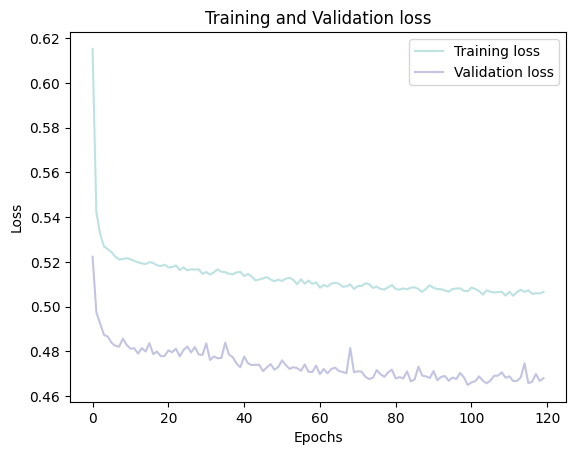

In [8]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

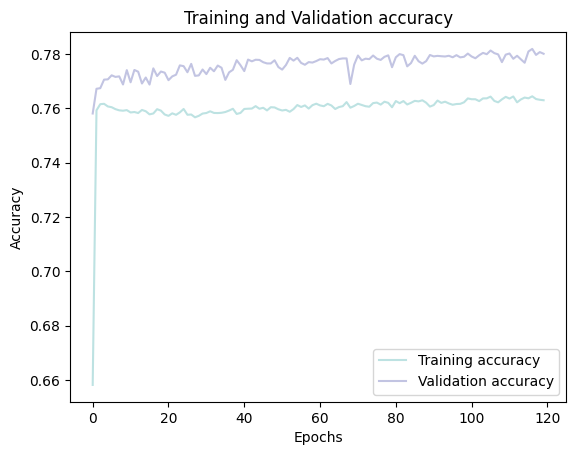

In [9]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

1207/1207 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step
              precision    recall  f1-score   support

       False       0.79      0.84      0.81     22128
        True       0.76      0.70      0.73     16483

    accuracy                           0.78     38611
   macro avg       0.78      0.77      0.77     38611
weighted avg       0.78      0.78      0.78     38611

